## Pandas

- filtering
- sorting
- useful methods
- group by
- merge

In [179]:
import pandas as pd
from datetime import datetime

# Define the data as a list of dictionaries with 10 student records
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'Mathematics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Computer Science', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# Create the DataFrame
students_df : pd.DataFrame = pd.DataFrame(students_data)

# Convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# Show the DataFrame
display(students_df)

# Verify the data types
display(students_df.info())

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Mathematics,2023-04-10,13000
4,5,Eva,John,Computer Science,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   roll_no            10 non-null     int64         
 1   name               10 non-null     object        
 2   father             10 non-null     object        
 3   course             10 non-null     object        
 4   date_of_admission  10 non-null     datetime64[ns]
 5   fee                10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 612.0+ bytes


None

In [180]:
import pandera as pa
from pandera.typing import Series
from datetime import datetime
import pandas as pd

# Define the schema using SchemaModel
class StudentSchema(pa.SchemaModel):
    roll_no: Series[int] = pa.Field(ge=1)
    name: Series[str] = pa.Field(nullable=False)
    father: Series[str] = pa.Field(nullable=False)
    course: Series[str] = pa.Field(nullable=False)
    date_of_admission: Series[datetime] = pa.Field(le=datetime.now())
    fee: Series[int] = pa.Field(ge=0)

    class Config:
        coerce = True  # Automatically coerce types if possible
        strict = True  # Ensure all columns are accounted for in the schema

# Data for 10 students
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'Physics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Physics', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# Create the DataFrame
students_df = pd.DataFrame(students_data)

# Convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# Validate the DataFrame
validated_df = StudentSchema.validate(students_df)

print(type(validated_df))
print(validated_df)

<class 'pandas.core.frame.DataFrame'>
   roll_no    name   father     course date_of_admission    fee
0        1   Alice      Bob    Physics        2023-01-10  10000
1        2   Brian    Steve  Chemistry        2023-02-12  11000
2        3   Chloe      Tim    Biology        2023-03-14  12000
3        4   David     Rick    Physics        2023-04-10  13000
4        5     Eva     John    Physics        2023-05-16  14000
5        6   Frank      Tom  Economics        2023-06-21  15000
6        7   Grace    Harry    History        2023-07-25  16000
7        8   Henry  Charles  Geography        2023-08-17  17000
8        9  Isabel   Oliver    English        2023-09-10  18000
9       10    Jack     Noah        Art        2023-10-05  19000


### apply the filter or filter functions on dataframe

In [181]:
??pd.DataFrame.head

Signature: pd.DataFrame.head(self, n: 'int' = 5) -> 'Self'
Source:   
    @final
    def head(self, n: int = 5) -> Self:
        """
        Return the first `n` rows.

        This function returns the first `n` rows for the object based
        on position. It is useful for quickly testing if your object
        has the right type of data in it.

        For negative values of `n`, this function returns all rows except
        the last `|n|` rows, equivalent to ``df[:n]``.

        If n is larger than the number of rows, this function returns all rows.

        Parameters
        ----------
        n : int, default 5
            Number of rows to select.

        Returns
        -------
        same type as caller
            The first `n` rows of the caller object.

        See Also
        --------
        DataFrame.tail: Returns the last `n` rows.

        Examples
        --------
        >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
        ...         

In [182]:
students_df.head(1)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000


In [183]:
students_df.course.value_counts()


course
Physics      3
Chemistry    1
Biology      1
Economics    1
History      1
Geography    1
English      1
Art          1
Name: count, dtype: int64

In [184]:
students_df["course"].value_counts()

course
Physics      3
Chemistry    1
Biology      1
Economics    1
History      1
Geography    1
English      1
Art          1
Name: count, dtype: int64

In [185]:
students_df["course"].values

array(['Physics', 'Chemistry', 'Biology', 'Physics', 'Physics',
       'Economics', 'History', 'Geography', 'English', 'Art'],
      dtype=object)

In [186]:
students_df.course.value_counts(dropna=False)# also counts null cells values


course
Physics      3
Chemistry    1
Biology      1
Economics    1
History      1
Geography    1
English      1
Art          1
Name: count, dtype: int64

In [187]:
help(pd.DataFrame.value_counts)

Help on function value_counts in module pandas.core.frame:

value_counts(self, subset: 'IndexLabel | None' = None, normalize: 'bool' = False, sort: 'bool' = True, ascending: 'bool' = False, dropna: 'bool' = True) -> 'Series'
    Return a Series containing the frequency of each distinct row in the Dataframe.
    
    Parameters
    ----------
    subset : label or list of labels, optional
        Columns to use when counting unique combinations.
    normalize : bool, default False
        Return proportions rather than frequencies.
    sort : bool, default True
        Sort by frequencies when True. Sort by DataFrame column values when False.
    ascending : bool, default False
        Sort in ascending order.
    dropna : bool, default True
        Don't include counts of rows that contain NA values.
    
        .. versionadded:: 1.3.0
    
    Returns
    -------
    Series
    
    See Also
    --------
    Series.value_counts: Equivalent method on Series.
    
    Notes
    -----
 

In [188]:
students_df.course.value_counts(dropna=False,normalize=True)# also counts null cells values


course
Physics      0.3
Chemistry    0.1
Biology      0.1
Economics    0.1
History      0.1
Geography    0.1
English      0.1
Art          0.1
Name: proportion, dtype: float64

In [189]:
students_df.course.value_counts(dropna=False,normalize=True) * 100# also counts null cells values


course
Physics      30.0
Chemistry    10.0
Biology      10.0
Economics    10.0
History      10.0
Geography    10.0
English      10.0
Art          10.0
Name: proportion, dtype: float64

In [190]:
students_df

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


In [191]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set a seed for reproducibility
np.random.seed(0)

# Define the number of transactions
num_transactions = 1000

# Generate random dates within the current year
current_year = datetime.now().year
start_date = datetime(current_year, 1, 1)
end_date = datetime.now()

# Generate a list of random dates within the year
random_dates = [start_date + timedelta(days=np.random.randint(0, (end_date - start_date).days))
                for _ in range(num_transactions)]

# Generate a list of random fee amounts
random_fees = np.random.randint(low=1, high=5000, size=num_transactions)

# Create the DataFrame
fee_transactions = pd.DataFrame({
    'date': random_dates,
    'fee': random_fees
})

# Sort by date for readability
fee_transactions.sort_values('date', inplace=True)

# Reset index after sorting
fee_transactions.reset_index(drop=True, inplace=True)

print(fee_transactions)

          date   fee
0   2023-01-01  4525
1   2023-01-01  1867
2   2023-01-01  2299
3   2023-01-01  3005
4   2023-01-03   638
..         ...   ...
995 2023-12-01  3340
996 2023-12-01  4117
997 2023-12-02  2334
998 2023-12-02  1782
999 2023-12-02  2114

[1000 rows x 2 columns]


In [192]:
pd.cut(fee_transactions.fee,
       [1,500,1000,3000,4000,5000])

0      (4000, 5000]
1      (1000, 3000]
2      (1000, 3000]
3      (3000, 4000]
4       (500, 1000]
           ...     
995    (3000, 4000]
996    (4000, 5000]
997    (1000, 3000]
998    (1000, 3000]
999    (1000, 3000]
Name: fee, Length: 1000, dtype: category
Categories (5, interval[int64, right]): [(1, 500] < (500, 1000] < (1000, 3000] < (3000, 4000] < (4000, 5000]]

In [193]:
pd.cut(fee_transactions.fee,
       [1,500,1000,3000,4000,5000]).value_counts()

fee
(1000, 3000]    422
(3000, 4000]    199
(4000, 5000]    197
(1, 500]        108
(500, 1000]      74
Name: count, dtype: int64

In [194]:
pd.cut(fee_transactions.fee,
       [1,500,1000,3000,4000,5000]).value_counts(normalize=True)*100

fee
(1000, 3000]    42.2
(3000, 4000]    19.9
(4000, 5000]    19.7
(1, 500]        10.8
(500, 1000]      7.4
Name: proportion, dtype: float64

In [195]:
pd.qcut(fee_transactions.fee, [0.3,.5, .7, .9, 1])


0        (4461.7, 4998.0]
1      (1560.299, 2432.0]
2      (1560.299, 2432.0]
3        (2432.0, 3552.4]
4                     NaN
              ...        
995      (2432.0, 3552.4]
996      (3552.4, 4461.7]
997    (1560.299, 2432.0]
998    (1560.299, 2432.0]
999    (1560.299, 2432.0]
Name: fee, Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(1560.299, 2432.0] < (2432.0, 3552.4] < (3552.4, 4461.7] < (4461.7, 4998.0]]

In [196]:
pd.qcut(fee_transactions.fee, [0,0.3,.5, .7, .9, 1]).value_counts(normalize=True)*100


fee
(13.999, 1560.3]    30.0
(1560.3, 2432.0]    20.0
(2432.0, 3552.4]    20.0
(3552.4, 4461.7]    20.0
(4461.7, 4998.0]    10.0
Name: proportion, dtype: float64

In [197]:
students_df.head()

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000


### filter on columns

In [198]:
import pandera as pa
from pandera.typing import Series
from datetime import datetime
import pandas as pd

# Define the schema using SchemaModel
class StudentSchema(pa.SchemaModel):
    roll_no: Series[int] = pa.Field(ge=1)
    name: Series[str] = pa.Field(nullable=False)
    father: Series[str] = pa.Field(nullable=False)
    course: Series[str] = pa.Field(nullable=False)
    date_of_admission: Series[datetime] = pa.Field(le=datetime.now())
    fee: Series[int] = pa.Field(ge=0)

    class Config:
        coerce = True  # Automatically coerce types if possible
        strict = True  # Ensure all columns are accounted for in the schema

# Data for 10 students
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'physics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Physics', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# Create the DataFrame
students_df = pd.DataFrame(students_data)

# Convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# Validate the DataFrame
validated_df = StudentSchema.validate(students_df)

print(validated_df)

   roll_no    name   father     course date_of_admission    fee
0        1   Alice      Bob    Physics        2023-01-10  10000
1        2   Brian    Steve  Chemistry        2023-02-12  11000
2        3   Chloe      Tim    Biology        2023-03-14  12000
3        4   David     Rick    physics        2023-04-10  13000
4        5     Eva     John    Physics        2023-05-16  14000
5        6   Frank      Tom  Economics        2023-06-21  15000
6        7   Grace    Harry    History        2023-07-25  16000
7        8   Henry  Charles  Geography        2023-08-17  17000
8        9  Isabel   Oliver    English        2023-09-10  18000
9       10    Jack     Noah        Art        2023-10-05  19000


In [199]:
students_df.head(10)


,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


In [200]:
a = students_df["course"] == "Physics"
print(type(a))
a

<class 'pandas.core.series.Series'>


0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [117]:
students_df[a]

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
4,5,Eva,John,Physics,2023-05-16,14000


In [118]:
students_df['course'].str.lower() == 'physics'


0     True
1    False
2    False
3     True
4     True
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [119]:
students_df[students_df['course'].str.lower() == 'physics']


,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000


In [120]:
students_df["course"].values

array(['Physics', 'Chemistry', 'Biology', 'physics', 'Physics',
       'Economics', 'History', 'Geography', 'English', 'Art'],
      dtype=object)

In [121]:
students_df['course'].str.lower().str.contains('cs')


0     True
1    False
2    False
3     True
4     True
5     True
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [122]:
students_df[students_df['course'].str.lower().str.contains('cs')]


,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000


In [123]:
students_df[(students_df['course'].str.lower().str.contains('cs')) & (students_df['fee']>=14000)]


,roll_no,name,father,course,date_of_admission,fee
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000


In [124]:
students_df[students_df['course'].str.lower().str.contains("cs") | students_df['course'].str.lower().str.contains("r")]


,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
9,10,Jack,Noah,Art,2023-10-05,19000


In [125]:
import pandera as pa
from pandera.typing import Series
from datetime import datetime
import pandas as pd

# Define the schema using SchemaModel
class StudentSchema(pa.SchemaModel):
    roll_no: Series[int] = pa.Field(ge=1)
    name: Series[str] = pa.Field(nullable=False)
    father: Series[str] = pa.Field(nullable=False)
    course: Series[str] = pa.Field(nullable=False)
    date_of_admission: Series[datetime] = pa.Field(le=datetime.now())
    fee: Series[int] = pa.Field(ge=0)

    class Config:
        coerce = True  # Automatically coerce types if possible
        strict = True  # Ensure all columns are accounted for in the schema

# Data for 10 students
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'physics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Physics', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# Create the DataFrame
students_df = pd.DataFrame(students_data)

# Convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# Validate the DataFrame
validated_df = StudentSchema.validate(students_df)

print(validated_df)

   roll_no    name   father     course date_of_admission    fee
0        1   Alice      Bob    Physics        2023-01-10  10000
1        2   Brian    Steve  Chemistry        2023-02-12  11000
2        3   Chloe      Tim    Biology        2023-03-14  12000
3        4   David     Rick    physics        2023-04-10  13000
4        5     Eva     John    Physics        2023-05-16  14000
5        6   Frank      Tom  Economics        2023-06-21  15000
6        7   Grace    Harry    History        2023-07-25  16000
7        8   Henry  Charles  Geography        2023-08-17  17000
8        9  Isabel   Oliver    English        2023-09-10  18000
9       10    Jack     Noah        Art        2023-10-05  19000


## apply filter on date column

In [126]:
print(type(students_df['date_of_admission']))
students_df['date_of_admission']


<class 'pandas.core.series.Series'>


0   2023-01-10
1   2023-02-12
2   2023-03-14
3   2023-04-10
4   2023-05-16
5   2023-06-21
6   2023-07-25
7   2023-08-17
8   2023-09-10
9   2023-10-05
Name: date_of_admission, dtype: datetime64[ns]

In [127]:
students_df['date_of_admission'].dt.year
students_df['date_of_admission'].dt.month
students_df['date_of_admission'].dt.day
students_df['date_of_admission'].dt.weekday
students_df['date_of_admission'].dt.day_of_week
students_df['date_of_admission'].dt.hour
students_df['date_of_admission'].dt.minute
students_df['date_of_admission'].dt.second
students_df['date_of_admission'].dt.microsecond
students_df['date_of_admission'].dt.tz
students_df['date_of_admission'].dt.tz_localize
students_df['date_of_admission'].dt.tz_convert
students_df['date_of_admission'].dt.tz_localize(None)

0   2023-01-10
1   2023-02-12
2   2023-03-14
3   2023-04-10
4   2023-05-16
5   2023-06-21
6   2023-07-25
7   2023-08-17
8   2023-09-10
9   2023-10-05
Name: date_of_admission, dtype: datetime64[ns]

In [128]:
[i for i in dir(students_df['date_of_admission'].dt) if "_" not in i]


['ceil',
 'date',
 'day',
 'dayofweek',
 'dayofyear',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'nanosecond',
 'normalize',
 'quarter',
 'round',
 'second',
 'strftime',
 'time',
 'timetz',
 'tz',
 'unit',
 'weekday',
 'year']

In [129]:
from datetime import datetime

date : datetime = datetime.now() #datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
date

datetime.datetime(2023, 12, 3, 23, 35, 29, 175783)

In [130]:
s1 : pd.Series = pd.Series([date])
s1

0   2023-12-03 23:35:29.175783
dtype: datetime64[ns]

In [131]:
s1.dt.strftime("%Y/%m %d %I %b %B") # convet from date to text 


0    2023/12 03 11 Dec December
dtype: object

In [132]:
s2 :pd.Series =  pd.Series(['01 Nov 2023', '01 Nov 2024', '01 Jan 2022'])
s2

0    01 Nov 2023
1    01 Nov 2024
2    01 Jan 2022
dtype: object

In [133]:
s2.apply(lambda x: datetime.strptime(x,"%d %b %Y") ) # string to datetime


0   2023-11-01
1   2024-11-01
2   2022-01-01
dtype: datetime64[ns]

### Group by

In [134]:
import pandera as pa
from pandera.typing import Series
from datetime import datetime
import pandas as pd

# Define the schema using SchemaModel
class StudentSchema(pa.SchemaModel):
    roll_no: Series[int] = pa.Field(ge=1)
    name: Series[str] = pa.Field(nullable=False)
    father: Series[str] = pa.Field(nullable=False)
    course: Series[str] = pa.Field(nullable=False)
    date_of_admission: Series[datetime] = pa.Field(le=datetime.now())
    fee: Series[int] = pa.Field(ge=0)

    class Config:
        coerce = True  # Automatically coerce types if possible
        strict = True  # Ensure all columns are accounted for in the schema

# Data for 10 students
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'Physics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Physics', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# Create the DataFrame
students_df = pd.DataFrame(students_data)

# Convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# Validate the DataFrame
validated_df = StudentSchema.validate(students_df)

print(validated_df)

   roll_no    name   father     course date_of_admission    fee
0        1   Alice      Bob    Physics        2023-01-10  10000
1        2   Brian    Steve  Chemistry        2023-02-12  11000
2        3   Chloe      Tim    Biology        2023-03-14  12000
3        4   David     Rick    Physics        2023-04-10  13000
4        5     Eva     John    Physics        2023-05-16  14000
5        6   Frank      Tom  Economics        2023-06-21  15000
6        7   Grace    Harry    History        2023-07-25  16000
7        8   Henry  Charles  Geography        2023-08-17  17000
8        9  Isabel   Oliver    English        2023-09-10  18000
9       10    Jack     Noah        Art        2023-10-05  19000


In [135]:
??pd.DataFrame.groupby

Signature:
pd.DataFrame.groupby(
    self,
    by=None,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    level: 'IndexLabel | None' = None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    observed: 'bool | lib.NoDefault' = <no_default>,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, pd.Grouper or list of such
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If a list 

In [136]:
students_df.groupby(['course'])


In [137]:
list(students_df.groupby(['course']))


[(('Art',),
     roll_no  name father course date_of_admission    fee
  9       10  Jack   Noah    Art        2023-10-05  19000),
 (('Biology',),
     roll_no   name father   course date_of_admission    fee
  2        3  Chloe    Tim  Biology        2023-03-14  12000),
 (('Chemistry',),
     roll_no   name father     course date_of_admission    fee
  1        2  Brian  Steve  Chemistry        2023-02-12  11000),
 (('Economics',),
     roll_no   name father     course date_of_admission    fee
  5        6  Frank    Tom  Economics        2023-06-21  15000),
 (('English',),
     roll_no    name  father   course date_of_admission    fee
  8        9  Isabel  Oliver  English        2023-09-10  18000),
 (('Geography',),
     roll_no   name   father     course date_of_admission    fee
  7        8  Henry  Charles  Geography        2023-08-17  17000),
 (('History',),
     roll_no   name father   course date_of_admission    fee
  6        7  Grace  Harry  History        2023-07-25  16000),
 (('

In [138]:
for group in list(students_df.groupby(['course'])):
    display(group[0])
    display(group[1])
    print('================================')

('Art',)

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


('Biology',)

,roll_no,name,father,course,date_of_admission,fee
2,3,Chloe,Tim,Biology,2023-03-14,12000


('Chemistry',)

,roll_no,name,father,course,date_of_admission,fee
1,2,Brian,Steve,Chemistry,2023-02-12,11000


('Economics',)

,roll_no,name,father,course,date_of_admission,fee
5,6,Frank,Tom,Economics,2023-06-21,15000


('English',)

,roll_no,name,father,course,date_of_admission,fee
8,9,Isabel,Oliver,English,2023-09-10,18000


('Geography',)

,roll_no,name,father,course,date_of_admission,fee
7,8,Henry,Charles,Geography,2023-08-17,17000


('History',)

,roll_no,name,father,course,date_of_admission,fee
6,7,Grace,Harry,History,2023-07-25,16000


('Physics',)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
3,4,David,Rick,Physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000


In [139]:
list(students_df.groupby(['course']))[0]


(('Art',),
    roll_no  name father course date_of_admission    fee
 9       10  Jack   Noah    Art        2023-10-05  19000)

In [140]:
list(students_df.groupby(['course']))[0][0]


('Art',)

In [141]:
list(students_df.groupby(['course']))[0][1]


,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


In [142]:
for group in list(students_df.groupby([students_df['date_of_admission'].dt.strftime("%B")])):
    display(group[0])
    display(group[1])
    print('================================')

('April',)

,roll_no,name,father,course,date_of_admission,fee
3,4,David,Rick,Physics,2023-04-10,13000


('August',)

,roll_no,name,father,course,date_of_admission,fee
7,8,Henry,Charles,Geography,2023-08-17,17000


('February',)

,roll_no,name,father,course,date_of_admission,fee
1,2,Brian,Steve,Chemistry,2023-02-12,11000


('January',)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000


('July',)

,roll_no,name,father,course,date_of_admission,fee
6,7,Grace,Harry,History,2023-07-25,16000


('June',)

,roll_no,name,father,course,date_of_admission,fee
5,6,Frank,Tom,Economics,2023-06-21,15000


('March',)

,roll_no,name,father,course,date_of_admission,fee
2,3,Chloe,Tim,Biology,2023-03-14,12000


('May',)

,roll_no,name,father,course,date_of_admission,fee
4,5,Eva,John,Physics,2023-05-16,14000


('October',)

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


('September',)

,roll_no,name,father,course,date_of_admission,fee
8,9,Isabel,Oliver,English,2023-09-10,18000


In [143]:
for group in list(students_df.groupby([students_df['date_of_admission'].dt.strftime("%B"), students_df['course']])):
    display(group[0])
    display(group[1])
    print('================================')

('April', 'Physics')

,roll_no,name,father,course,date_of_admission,fee
3,4,David,Rick,Physics,2023-04-10,13000


('August', 'Geography')

,roll_no,name,father,course,date_of_admission,fee
7,8,Henry,Charles,Geography,2023-08-17,17000


('February', 'Chemistry')

,roll_no,name,father,course,date_of_admission,fee
1,2,Brian,Steve,Chemistry,2023-02-12,11000


('January', 'Physics')

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000


('July', 'History')

,roll_no,name,father,course,date_of_admission,fee
6,7,Grace,Harry,History,2023-07-25,16000


('June', 'Economics')

,roll_no,name,father,course,date_of_admission,fee
5,6,Frank,Tom,Economics,2023-06-21,15000


('March', 'Biology')

,roll_no,name,father,course,date_of_admission,fee
2,3,Chloe,Tim,Biology,2023-03-14,12000


('May', 'Physics')

,roll_no,name,father,course,date_of_admission,fee
4,5,Eva,John,Physics,2023-05-16,14000


('October', 'Art')

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


('September', 'English')

,roll_no,name,father,course,date_of_admission,fee
8,9,Isabel,Oliver,English,2023-09-10,18000


In [144]:
students_df.groupby(['course']).aggregate('count')


,roll_no,name,father,date_of_admission,fee
course,,,,,
Art,1,1,1,1,1
Biology,1,1,1,1,1
Chemistry,1,1,1,1,1
Economics,1,1,1,1,1
English,1,1,1,1,1
Geography,1,1,1,1,1
History,1,1,1,1,1
Physics,3,3,3,3,3


In [145]:
from numpy import mean


students_df.groupby(['course'])[['fee']].agg([len,min, max])

/var/folders/t8/3sggsgnd6l5b6hy80l4xzr540000gn/T/ipykernel_1742/1462776764.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(['course'])[['fee']].agg([len,min, max])
/var/folders/t8/3sggsgnd6l5b6hy80l4xzr540000gn/T/ipykernel_1742/1462776764.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(['course'])[['fee']].agg([len,min, max])


fee              
          len    min    max
course                     
Art         1  19000  19000
Biology     1  12000  12000
Chemistry   1  11000  11000
Economics   1  15000  15000
English     1  18000  18000
Geography   1  17000  17000
History     1  16000  16000
Physics     3  10000  14000

In [146]:
students_df.groupby(['course',students_df['date_of_admission'].dt.strftime("%B")])[['fee']].agg([len,min, max])


/var/folders/t8/3sggsgnd6l5b6hy80l4xzr540000gn/T/ipykernel_1742/4120950183.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(['course',students_df['date_of_admission'].dt.strftime("%B")])[['fee']].agg([len,min, max])
/var/folders/t8/3sggsgnd6l5b6hy80l4xzr540000gn/T/ipykernel_1742/4120950183.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(['course',students_df['date_of_admission'].dt.strftime("%B")])[['fee']].agg([len,min, max])


fee              
                            len    min    max
course    date_of_admission                  
Art       October             1  19000  19000
Biology   March               1  12000  12000
Chemistry February            1  11000  11000
Economics June                1  15000  15000
English   September           1  18000  18000
Geography August              1  17000  17000
History   July                1  16000  16000
Physics   April               1  13000  13000
          January             1  10000  10000
          May                 1  14000  14000

In [147]:
students_df.groupby(['course']).apply(lambda x: x.head())


roll_no    name   father     course date_of_admission    fee
course                                                                   
Art       9       10    Jack     Noah        Art        2023-10-05  19000
Biology   2        3   Chloe      Tim    Biology        2023-03-14  12000
Chemistry 1        2   Brian    Steve  Chemistry        2023-02-12  11000
Economics 5        6   Frank      Tom  Economics        2023-06-21  15000
English   8        9  Isabel   Oliver    English        2023-09-10  18000
Geography 7        8   Henry  Charles  Geography        2023-08-17  17000
History   6        7   Grace    Harry    History        2023-07-25  16000
Physics   0        1   Alice      Bob    Physics        2023-01-10  10000
          3        4   David     Rick    Physics        2023-04-10  13000
          4        5     Eva     John    Physics        2023-05-16  14000

In [148]:
students_df.groupby(['course']).apply(lambda x: x.tail())


roll_no    name   father     course date_of_admission    fee
course                                                                   
Art       9       10    Jack     Noah        Art        2023-10-05  19000
Biology   2        3   Chloe      Tim    Biology        2023-03-14  12000
Chemistry 1        2   Brian    Steve  Chemistry        2023-02-12  11000
Economics 5        6   Frank      Tom  Economics        2023-06-21  15000
English   8        9  Isabel   Oliver    English        2023-09-10  18000
Geography 7        8   Henry  Charles  Geography        2023-08-17  17000
History   6        7   Grace    Harry    History        2023-07-25  16000
Physics   0        1   Alice      Bob    Physics        2023-01-10  10000
          3        4   David     Rick    Physics        2023-04-10  13000
          4        5     Eva     John    Physics        2023-05-16  14000

In [149]:
students_df

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


<Axes: xlabel='course'>

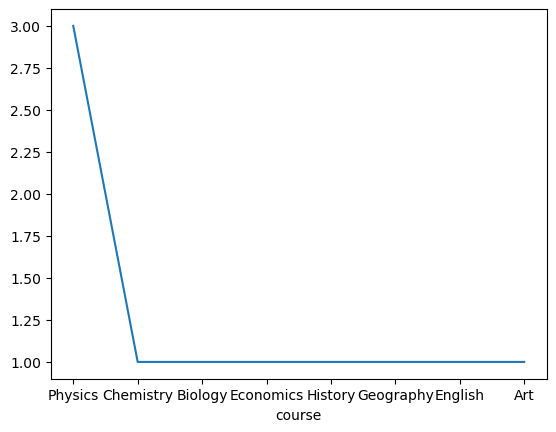

In [150]:
students_df["course"].value_counts().plot()

<Axes: xlabel='course'>

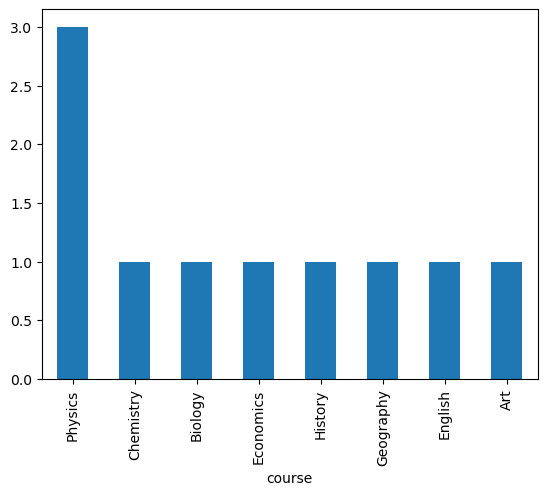

In [151]:
students_df.course.value_counts().plot(kind='bar')


<Axes: ylabel='proportion'>

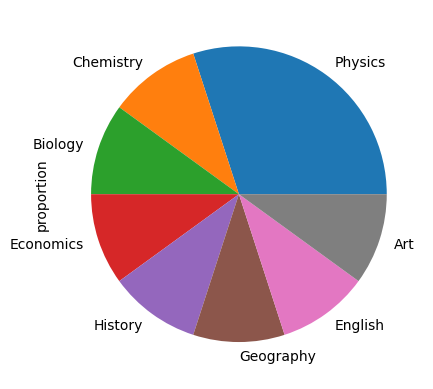

In [152]:
students_df.course.value_counts(normalize=True).plot(kind='pie')


In [153]:
students_df.groupby(["course"])["fee"].aggregate([min, max, np.mean])

/var/folders/t8/3sggsgnd6l5b6hy80l4xzr540000gn/T/ipykernel_1742/21708646.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(["course"])["fee"].aggregate([min, max, np.mean])
/var/folders/t8/3sggsgnd6l5b6hy80l4xzr540000gn/T/ipykernel_1742/21708646.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(["course"])["fee"].aggregate([min, max, np.mean])
/var/folders/t8/3sggsgnd6l5b6hy80l4xzr540000gn/T/ipykernel_1742/21708646.py:1: FutureWarning: The provided callable <function mean at 0x10776fce0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callab

,min,max,mean
course,,,
Art,19000,19000,19000.000000
Biology,12000,12000,12000.000000
Chemistry,11000,11000,11000.000000
Economics,15000,15000,15000.000000
English,18000,18000,18000.000000
Geography,17000,17000,17000.000000
History,16000,16000,16000.000000
Physics,10000,14000,12333.333333


/var/folders/t8/3sggsgnd6l5b6hy80l4xzr540000gn/T/ipykernel_1742/3857424697.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(['course'])[['fee']].aggregate([min,max, np.mean]    ).plot(kind='bar')
/var/folders/t8/3sggsgnd6l5b6hy80l4xzr540000gn/T/ipykernel_1742/3857424697.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(['course'])[['fee']].aggregate([min,max, np.mean]    ).plot(kind='bar')
/var/folders/t8/3sggsgnd6l5b6hy80l4xzr540000gn/T/ipykernel_1742/3857424697.py:1: FutureWarning: The provided callable <function mean at 0x10776fce0> is currently using SeriesGroupBy.mean. 

<Axes: xlabel='course'>

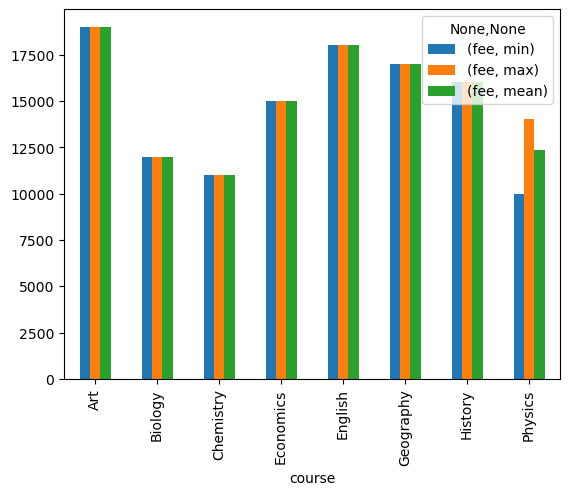

In [154]:
students_df.groupby(['course'])[['fee']].aggregate([min,max, np.mean]    ).plot(kind='bar')


### Data Wrangling

In [155]:
import pandas as pd
from typing import Dict, Union, List, Iterator

from collections.abc import Iterator

# Sample data for the 'students' DataFrame
students_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'teacher_id': [101, 102, 103, 101, 102]
}
students : pd.DataFrame = pd.DataFrame(students_data)

# Sample data for the 'teachers' DataFrame
teachers_data : Dict[str,List[Union[str,int]]] ={
    'teacher_id': [101, 102, 103],
    'course_name':['Physics', 'Chem','Maths'],
    'teacher_name': ['Mr. Smith', 'Ms. Johnson', 'Dr. Lee']
}
teachers = pd.DataFrame(teachers_data)

# Sample data for the 'student_fees' DataFrame
student_fees_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'fee_paid': [1500, 1500, 1500, 1500, 1500]
}
student_fees = pd.DataFrame(student_fees_data)

In [156]:
students

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,102


In [157]:
teachers

,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,103,Maths,Dr. Lee


In [158]:
student_fees

,student_id,fee_paid
0,1,1500
1,2,1500
2,3,1500
3,4,1500
4,5,1500


In [159]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  5 non-null      int64 
 1   name        5 non-null      object
 2   teacher_id  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes


In [160]:
students.describe()

,student_id,teacher_id
count,5.000000,5.00000
mean,3.000000,101.80000
std,1.581139,0.83666
min,1.000000,101.00000
25%,2.000000,101.00000
50%,3.000000,102.00000
75%,4.000000,102.00000
max,5.000000,103.00000


In [161]:
df1 : pd.DataFrame = pd.merge(students, teachers)
df1

,student_id,name,teacher_id,course_name,teacher_name
0,1,Alice,101,Physics,Mr. Smith
1,4,David,101,Physics,Mr. Smith
2,2,Bob,102,Chem,Ms. Johnson
3,5,Eva,102,Chem,Ms. Johnson
4,3,Charlie,103,Maths,Dr. Lee


In [162]:
import pandas as pd
from typing import Dict, Union, List

# Sample data for the 'students' DataFrame
students_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'teacher_id': [101, 102, 103, 101, 500]
}
students : pd.DataFrame = pd.DataFrame(students_data)

# Sample data for the 'teachers' DataFrame
teachers_data : Dict[str,List[Union[str,int]]] ={
    'teacher_id': [101, 102, 100],
    'course_name':['Physics', 'Chem','Maths'],
    'teacher_name': ['Mr. Smith', 'Ms. Johnson', 'Dr. Lee']
}
teachers = pd.DataFrame(teachers_data)

# Sample data for the 'student_fees' DataFrame
student_fees_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'fee_paid': [1500, 1500, 1500, 1500, 1500]
}
student_fees = pd.DataFrame(student_fees_data)

In [163]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id")
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1,Alice,101,Physics,Mr. Smith
1,4,David,101,Physics,Mr. Smith
2,2,Bob,102,Chem,Ms. Johnson


In [164]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id", how='inner')
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1,Alice,101,Physics,Mr. Smith
1,4,David,101,Physics,Mr. Smith
2,2,Bob,102,Chem,Ms. Johnson


In [165]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id", how='left')
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1,Alice,101,Physics,Mr. Smith
1,2,Bob,102,Chem,Ms. Johnson
2,3,Charlie,103,NaN,NaN
3,4,David,101,Physics,Mr. Smith
4,5,Eva,500,NaN,NaN


In [166]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id", how='right')
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1.0,Alice,101,Physics,Mr. Smith
1,4.0,David,101,Physics,Mr. Smith
2,2.0,Bob,102,Chem,Ms. Johnson
3,NaN,NaN,100,Maths,Dr. Lee


In [167]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id", how='outer')
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1.0,Alice,101,Physics,Mr. Smith
1,4.0,David,101,Physics,Mr. Smith
2,2.0,Bob,102,Chem,Ms. Johnson
3,3.0,Charlie,103,NaN,NaN
4,5.0,Eva,500,NaN,NaN
5,NaN,NaN,100,Maths,Dr. Lee


In [168]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, how='cross')
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id_x,teacher_id_y,course_name,teacher_name
0,1,Alice,101,101,Physics,Mr. Smith
1,1,Alice,101,102,Chem,Ms. Johnson
2,1,Alice,101,100,Maths,Dr. Lee
3,2,Bob,102,101,Physics,Mr. Smith
4,2,Bob,102,102,Chem,Ms. Johnson
5,2,Bob,102,100,Maths,Dr. Lee
6,3,Charlie,103,101,Physics,Mr. Smith
7,3,Charlie,103,102,Chem,Ms. Johnson
8,3,Charlie,103,100,Maths,Dr. Lee
9,4,David,101,101,Physics,Mr. Smith


In [169]:
import pandas as pd
from typing import Dict, Union, List

# Sample data for the 'students' DataFrame
students_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'teacher_id': [101, 102, 103, 101, 500]
}
students : pd.DataFrame = pd.DataFrame(students_data)

# Sample data for the 'teachers' DataFrame
teachers_data : Dict[str,List[Union[str,int]]] ={
    'tid': [101, 102, 100],
    'course_name':['Physics', 'Chem','Maths'],
    'teacher_name': ['Mr. Smith', 'Ms. Johnson', 'Dr. Lee']
}
teachers = pd.DataFrame(teachers_data)

# Sample data for the 'student_fees' DataFrame
student_fees_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'fee_paid': [1500, 1500, 1500, 1500, 1500]
}
student_fees = pd.DataFrame(student_fees_data)

In [170]:
display(students)
display(teachers)

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,tid,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


In [171]:
display(students)
display(teachers)

#                             left       right
df1 : pd.DataFrame = pd.merge(students, teachers, 
                              left_on="teacher_id",
                              right_on="tid",
                              how='inner')
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,tid,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


,student_id,name,teacher_id,tid,course_name,teacher_name
0,1,Alice,101,101,Physics,Mr. Smith
1,4,David,101,101,Physics,Mr. Smith
2,2,Bob,102,102,Chem,Ms. Johnson


In [172]:
import pandas as pd
from typing import Dict, Union, List

# Sample data for the 'students' DataFrame
students_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'teacher_id': [101, 102, 103, 101, 500]
}
students : pd.DataFrame = pd.DataFrame(students_data)

# Sample data for the 'teachers' DataFrame
teachers_data : Dict[str,List[Union[str,int]]] ={
    'tid': [101, 102, 100],
    'course_name':['Physics', 'Chem','Maths'],
    'teacher_name': ['Mr. Smith', 'Ms. Johnson', 'Dr. Lee']
}
teachers = pd.DataFrame(teachers_data)

# Sample data for the 'student_fees' DataFrame
student_fees_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 2, 1, 5],
    'fee_paid': [1500, 1500, 1500, 1500, 1500]
}
student_fees = pd.DataFrame(student_fees_data)


In [173]:
display(student_fees)

,student_id,fee_paid
0,1,1500
1,2,1500
2,2,1500
3,1,1500
4,5,1500


In [174]:
df3: pd.DataFrame = student_fees.groupby("student_id").agg('sum')
df3

,fee_paid
student_id,
1,3000
2,3000
5,1500


In [175]:
students

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


In [176]:
df4 : pd.DataFrame  = pd.merge(students,df3,
                               left_on="student_id",
                                right_index=True,
                                 how='outer' )
df4

,student_id,name,teacher_id,fee_paid
0,1,Alice,101,3000.0
1,2,Bob,102,3000.0
2,3,Charlie,103,NaN
3,4,David,101,NaN
4,5,Eva,500,1500.0


In [177]:
pd.concat([students, teachers, student_fees])# axis=0 #default value


,student_id,name,teacher_id,tid,course_name,teacher_name,fee_paid
0,1.0,Alice,101.0,NaN,NaN,NaN,NaN
1,2.0,Bob,102.0,NaN,NaN,NaN,NaN
2,3.0,Charlie,103.0,NaN,NaN,NaN,NaN
3,4.0,David,101.0,NaN,NaN,NaN,NaN
4,5.0,Eva,500.0,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,101.0,Physics,Mr. Smith,NaN
1,NaN,NaN,NaN,102.0,Chem,Ms. Johnson,NaN
2,NaN,NaN,NaN,100.0,Maths,Dr. Lee,NaN
0,1.0,NaN,NaN,NaN,NaN,NaN,1500.0
1,2.0,NaN,NaN,NaN,NaN,NaN,1500.0


In [178]:
pd.concat([students, teachers, student_fees], axis=1)# axis=0 #default value


,student_id,name,teacher_id,tid,course_name,teacher_name,student_id,fee_paid
0,1,Alice,101,101.0,Physics,Mr. Smith,1,1500
1,2,Bob,102,102.0,Chem,Ms. Johnson,2,1500
2,3,Charlie,103,100.0,Maths,Dr. Lee,2,1500
3,4,David,101,NaN,NaN,NaN,1,1500
4,5,Eva,500,NaN,NaN,NaN,5,1500


In [202]:
students_df

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000
